<a href="https://colab.research.google.com/github/helmaft/Lung-Cancer/blob/main/Lung_Cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import plotly.subplots as sp
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Lung Cancer/cancer patient data sets.csv')

**Data Analization**

In [5]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [8]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [9]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Patient Id,P1,P10,P100,P1000,P101
Age,33,17,35,37,46
Gender,1,1,1,1,1
Air Pollution,2,3,4,7,6
Alcohol use,4,1,5,7,8
Dust Allergy,5,5,6,7,7
OccuPational Hazards,4,3,5,7,7
Genetic Risk,3,4,5,6,7
chronic Lung Disease,2,2,4,7,6


In [10]:
df.groupby('Gender').describe()

index                                                             \
        count        mean         std  min     25%    50%     75%    max   
Gender                                                                     
1       598.0  505.591973  281.532866  0.0  267.25  503.5  746.50  999.0   
2       402.0  490.437811  299.456586  6.0  219.25  493.5  749.75  998.0   

          Age             ... Dry Cough      Snoring                           \
        count       mean  ...       75%  max   count      mean       std  min   
Gender                    ...                                                   
1       598.0  39.162207  ...       6.0  7.0   598.0  3.145485  1.396540  1.0   
2       402.0  34.216418  ...       5.0  7.0   402.0  2.599502  1.528222  1.0   

                            
        25%  50%  75%  max  
Gender                      
1       2.0  3.0  4.0  7.0  
2       1.0  2.0  3.0  7.0  

[2 rows x 184 columns]

In [11]:
#pearson related to gender
df2 = df.drop(columns=['Patient Id'])
df2['Level'] = pd.factorize(df.Level)[0]

In [12]:
df2.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [13]:
df2.corr()['Level']

index                       0.057758
Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Level                       1.000000
Name: Level, dtype: float64

In [14]:
df2.corr()['Level'].sort_values(ascending=False)

Level                       1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
index                       0.057758
Gender                     -0.164985
Name: Level, dtype: float64

In [15]:
df.shape

(1000, 26)

In [16]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [17]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [18]:
df['Patient Id'].iloc[0]

'P1'

In [19]:
df['GenderLabel'] = df['Gender']

In [20]:
df['GenderLabel'][df['Gender'] == 1] = 'Man'
df['GenderLabel'][df['Gender'] == 2] = 'Woman'

In [21]:
df.GenderLabel

0        Man
1        Man
2        Man
3        Man
4        Man
       ...  
995      Man
996    Woman
997    Woman
998    Woman
999      Man
Name: GenderLabel, Length: 1000, dtype: object

In [22]:
df['Patient Id'].value_counts()

Patient Id
P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: count, Length: 1000, dtype: int64

In [23]:
df['Age'].value_counts()

Age
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts()

Gender
1    598
2    402
Name: count, dtype: int64

In [25]:
df['Smoking'].value_counts()

Smoking
2    222
7    207
1    181
3    172
8     89
6     60
4     59
5     10
Name: count, dtype: int64

In [26]:
df['Genetic Risk'].value_counts()

Genetic Risk
7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: count, dtype: int64

In [27]:
df['Obesity'].value_counts()

Obesity
7    356
3    193
4    191
2    140
1     70
6     30
5     20
Name: count, dtype: int64

In [28]:
df['Alcohol use'].value_counts()

Alcohol use
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: count, dtype: int64

In [29]:
df['Balanced Diet'].value_counts()

Balanced Diet
7    296
2    231
3    173
6    159
4     61
5     40
1     40
Name: count, dtype: int64

In [30]:
df['Snoring'].value_counts()

Snoring
2    300
3    211
1    170
5    139
4    131
6     39
7     10
Name: count, dtype: int64

In [31]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [32]:
# Encode the 'Patient Id' column
df['Patient Id'] = label_encoder.fit_transform(df['Patient Id'])

# Encode the 'Level' column
df['Level'] = label_encoder.fit_transform(df['Level'])

# Display the first few rows after Label Encoding
print("After Label Encoding:")
print(df.head())

# Perform one-hot encoding on 'Level' column
df_encoded = pd.get_dummies(df, columns=['Level'])

# Drop the 'Patient Id' column if it's not needed for analysis
df_encoded = df_encoded.drop('Patient Id', axis=1)

# Display the first few rows after One-Hot Encoding
print("After One-Hot Encoding:")
print(df_encoded.head())

After Label Encoding:
   index  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0           0   33       1              2            4             5   
1      1           1   17       1              3            1             5   
2      2           2   35       1              4            5             6   
3      3           3   37       1              7            7             7   
4      4           4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Weight Loss  \
0                     4             3                     2  ...            4   
1                     3             4                     2  ...            3   
2                     5             5                     4  ...            7   
3                     7             6                     7  ...            2   
4                     7             7                     6  ...            2   

   Shortness of 

In [33]:
df = df.drop(columns=['index','OccuPational Hazards','chronic Lung Disease','Passive Smoker','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Clubbing of Finger Nails'])

Data Visualization

array([[<Axes: title={'center': 'Patient Id'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Air Pollution'}>],
       [<Axes: title={'center': 'Alcohol use'}>,
        <Axes: title={'center': 'Dust Allergy'}>,
        <Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'Balanced Diet'}>],
       [<Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Swallowing Difficulty'}>,
        <Axes: title={'center': 'Frequent Cold'}>],
       [<Axes: title={'center': 'Dry Cough'}>,
        <Axes: title={'center': 'Snoring'}>,
        <Axes: title={'center': 'Level'}>, <Axes: >]], dtype=object)

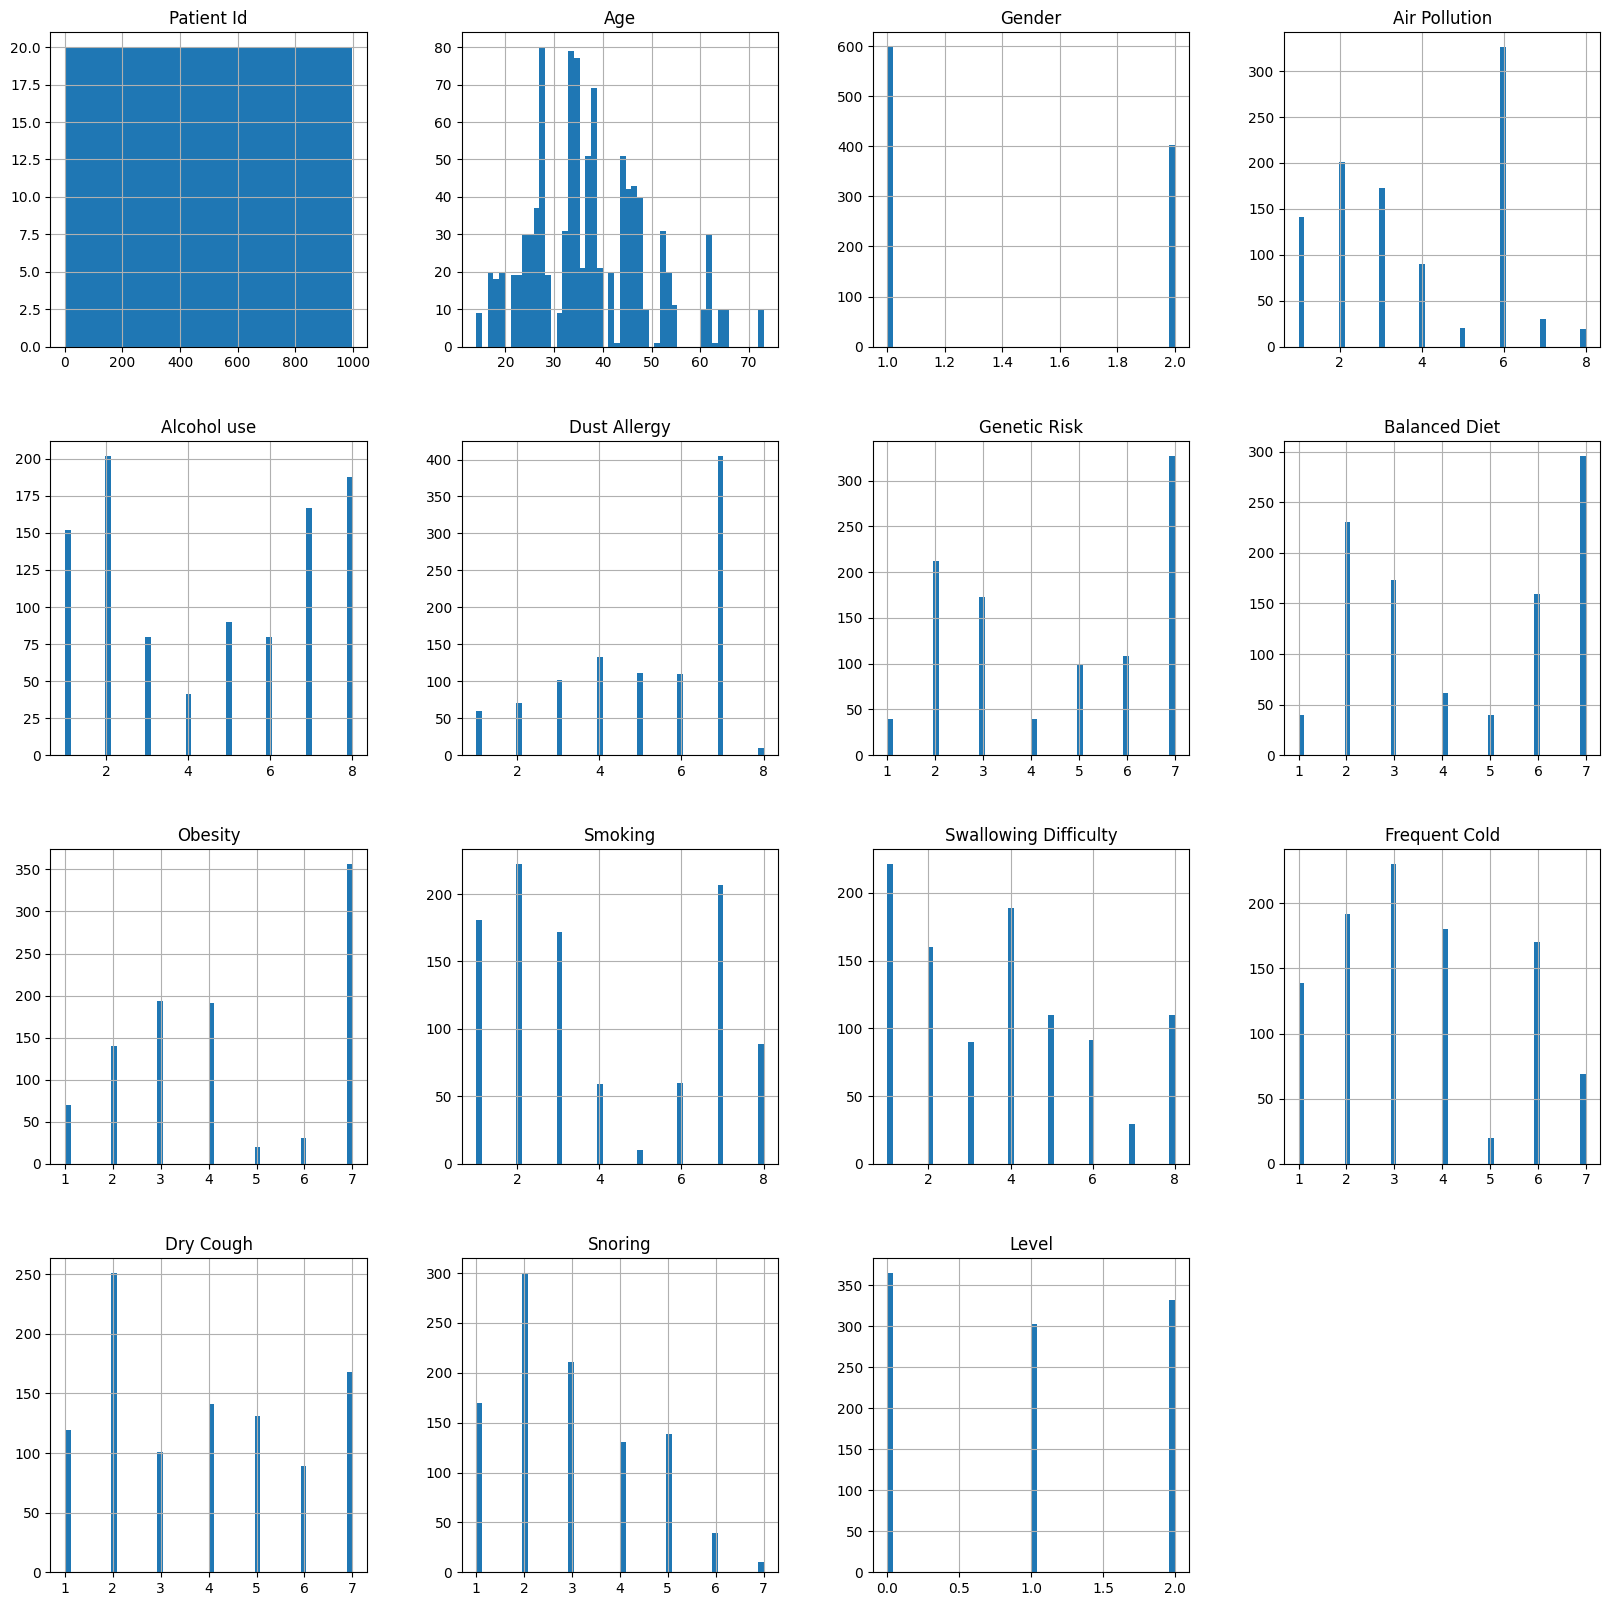

In [34]:
df.hist(bins=50, figsize=(20,20))

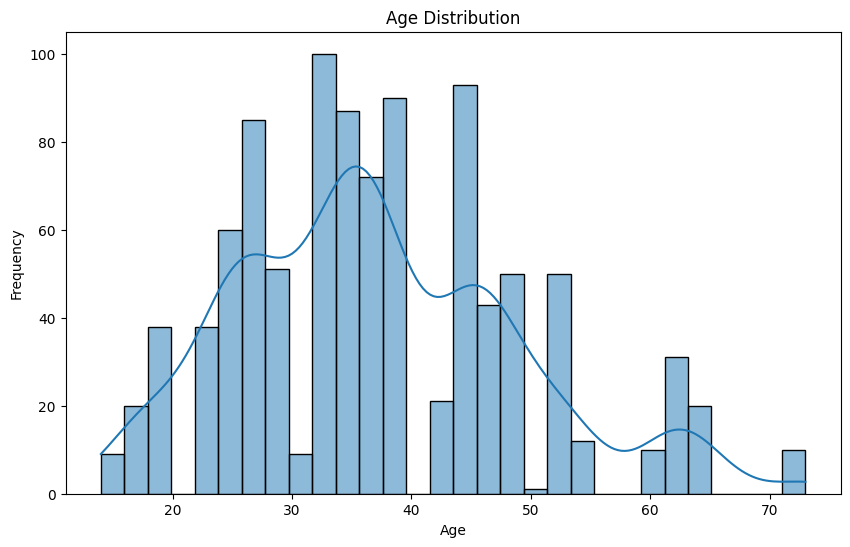

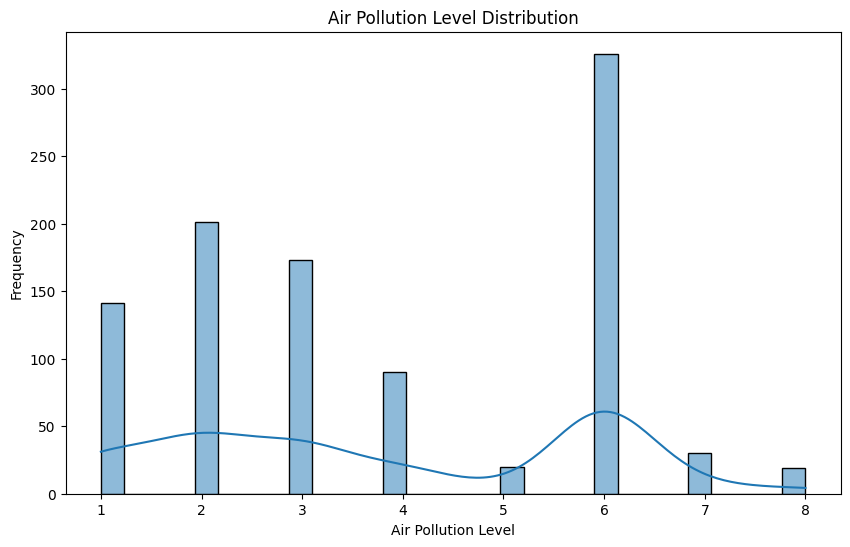

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of air pollution levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Air Pollution'], kde=True, bins=30)
plt.title('Air Pollution Level Distribution')
plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Group the data by smoking status and count the occurrences of each status
smoking_counts = df['Smoking'].value_counts()
smoking_counts = df['GenderLabel'].value_counts()

# Create a pie chart using plotly express
fig = px.pie(smoking_counts, values=smoking_counts.values, names=smoking_counts.index, title='Smoking Status Distribution')

# Show the pie chart
fig.show()


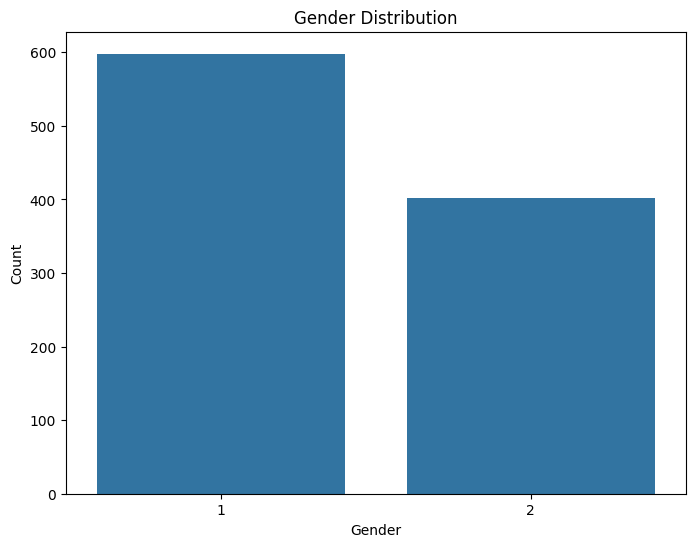

In [37]:
#Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df2)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

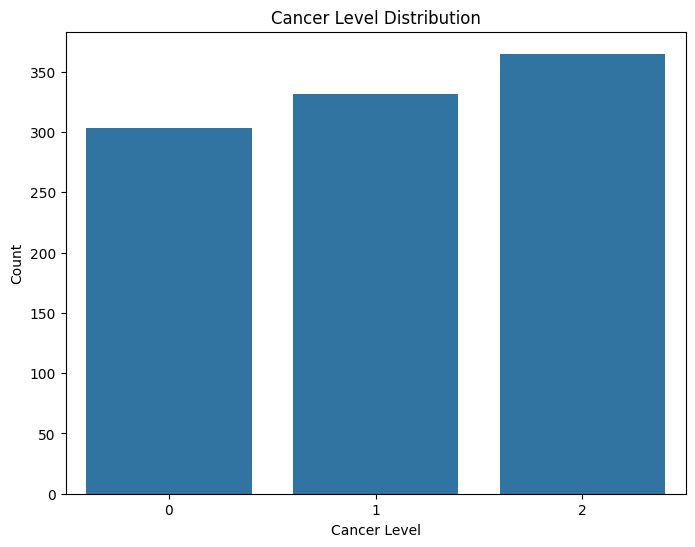

In [38]:
#Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df2)
plt.title('Cancer Level Distribution')
plt.xlabel('Cancer Level')
plt.ylabel('Count')
plt.show()

In [42]:
df['GenderLabel'][df['Gender'] =='Man'] = 1
df['GenderLabel'][df['Gender'] == 'Woman'] = 2

In [43]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Man'

<Figure size 1500x1000 with 0 Axes>

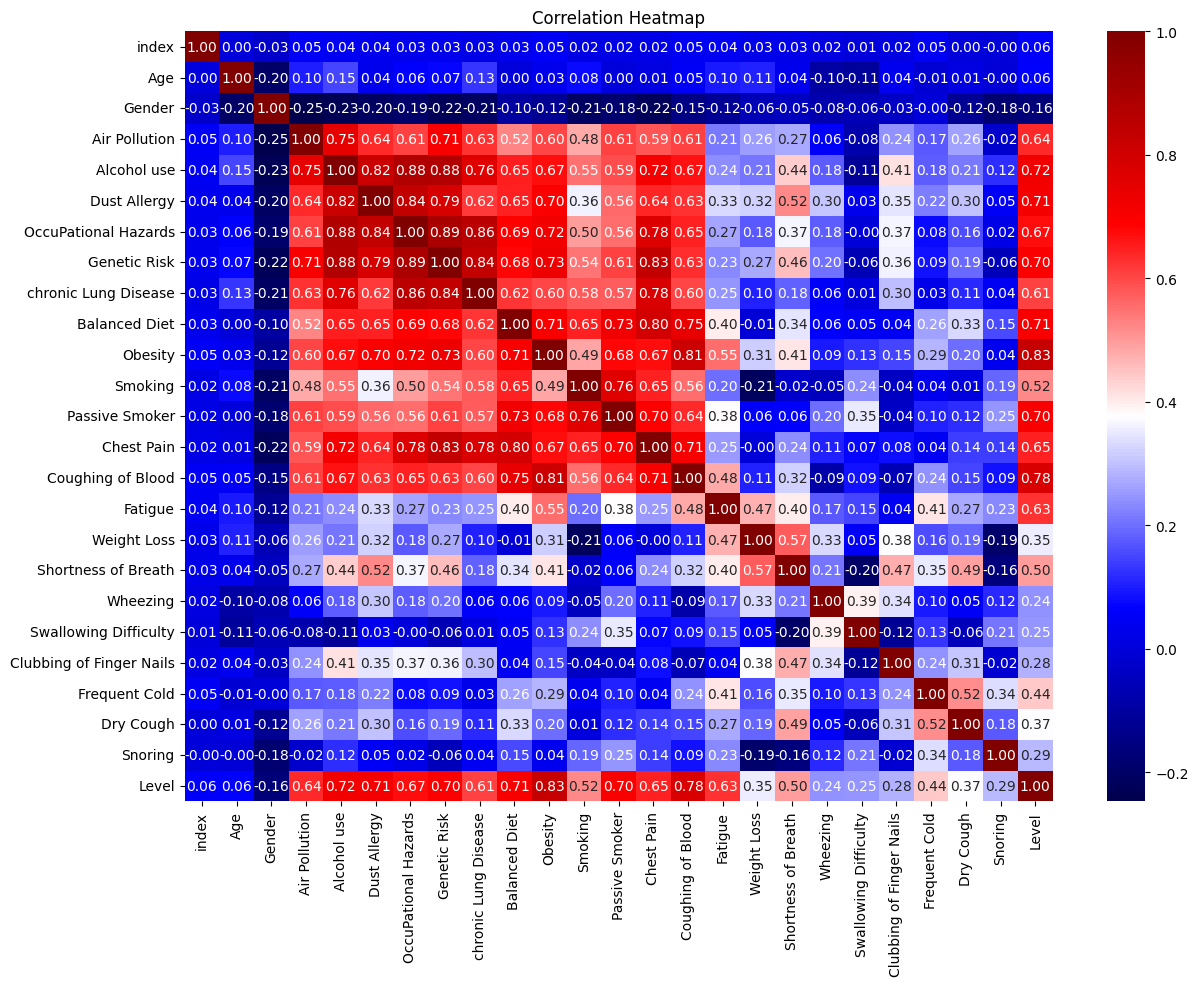

In [44]:
# Calculate correlation matrix, excluding non-numeric columns
corr_matrix = df2.select_dtypes(include=['number']).corr()
columns  =[]
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='seismic')
plt.title('Correlation Heatmap')
plt.show()

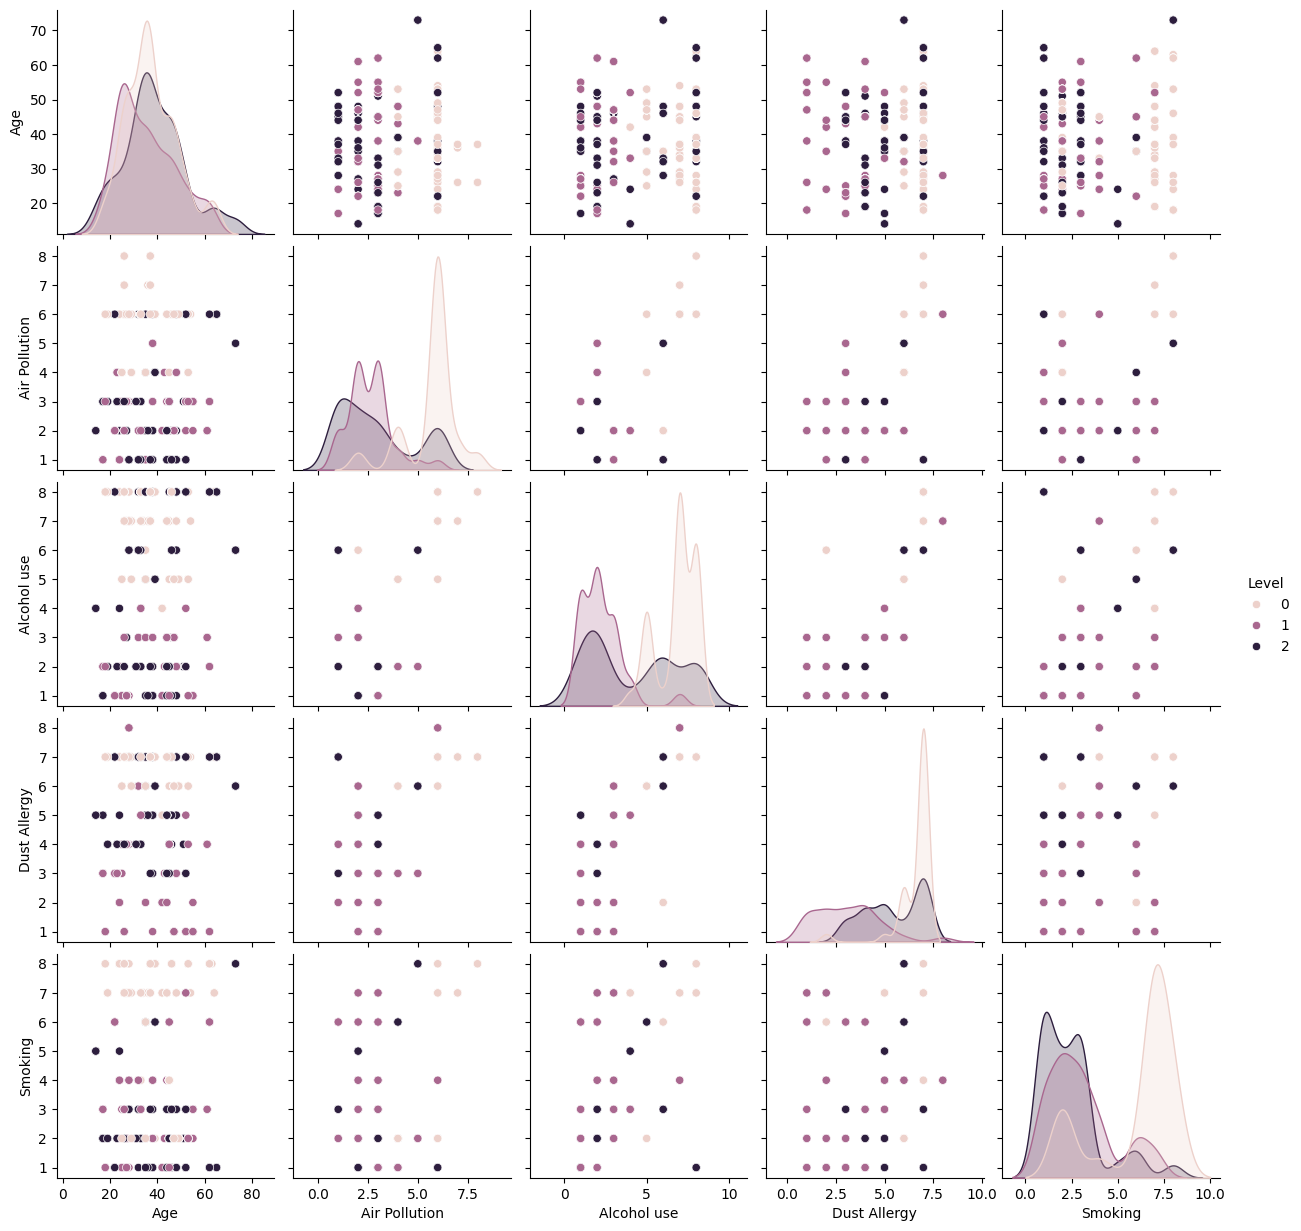

In [45]:
selected_features = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'Smoking', 'Level']
sns.pairplot(df[selected_features], hue='Level')
plt.show()

In [ ]:
#Age distribution by level
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Level', multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by Cancer Level')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

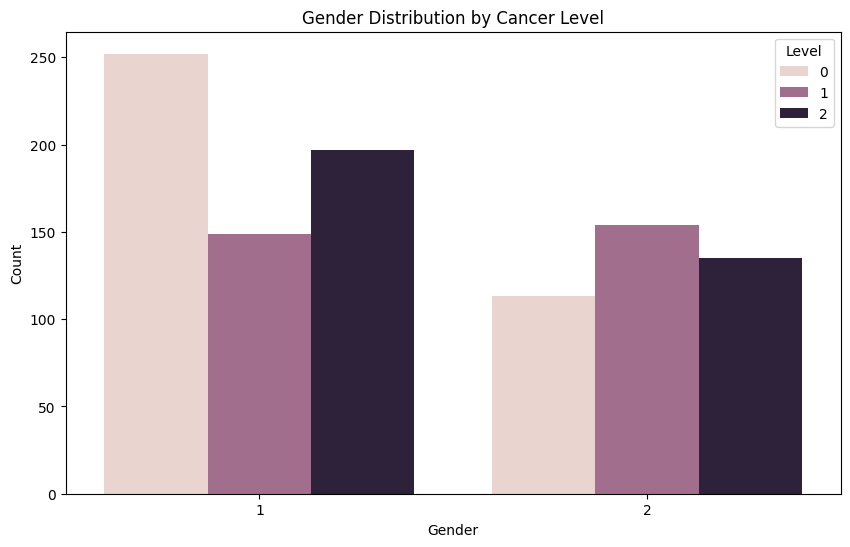

In [46]:
#gender distribution by level
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Level', data=df)
plt.title('Gender Distribution by Cancer Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Machine Learning Models**

In [54]:


# Drop the 'index' and 'Patient Id' columns
df = df.drop(['index', 'Patient Id'], axis=1)

# Encode the 'Level' column
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

# Define features and target variable
X = df.drop('Level', axis=1)
y = df['Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree}")

conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))


KeyError: "['index', 'Patient Id'] not found in axis"

ValueError: could not convert string to float: 'Man'

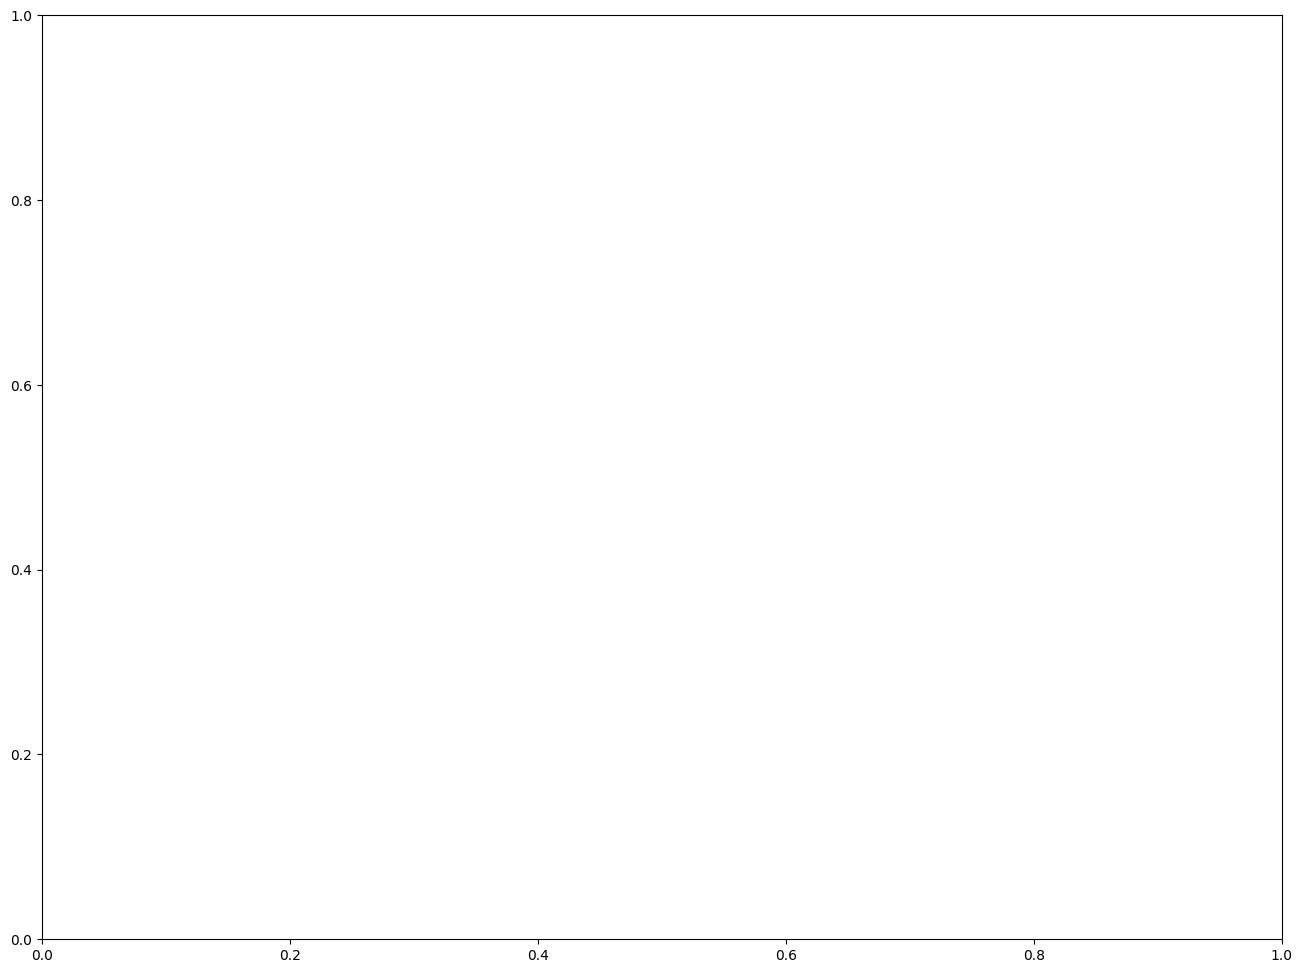

In [48]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(df.corr(), cmap = 'seismic', square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train a Model
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)


#Evaluation of the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [49]:
x = df.drop("Level", axis = 1)
y = df["Level"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

ValueError: could not convert string to float: 'Man'

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

In [50]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

NameError: name 'x_train' is not defined